In [1]:
import numpy as np
import qiskit

from qiskit_superstaq.custom_gates import AceCR
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [2]:
provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-qg2TsT3NDba_ybwYDMrXOizFv2vL1AfT5H4M-7Q2evQl4X9aeIwGR9qYPqzjqhrmr178gusxDRWdORl1GRnsRc9JIS17CsFOp0dkMkz5TrqMQIjlcc4PzPGGlp0MW7bnM7f8vRgEhqKq-ySdMlUNL7g")

In [3]:
qc = qiskit.QuantumCircuit(2)
qc.swap(0, 1)
print(qc)

        
q_0: ─X─
      │ 
q_1: ─X─
        


In [4]:
out = provider.ibmq_compile(qc, target="ibmq_bogota_qpu")

In [5]:
print(out.circuit)

                ┌───────────┐┌──────────┐┌─────────┐         ┌───────────┐»
q_0: ───────────┤1          ├┤ Rz(3π/2) ├┤ Rx(π/2) ├─────────┤1          ├»
     ┌─────────┐│  Acecr_mp │├─────────┬┘├─────────┤┌───────┐│  Acecr_pm │»
q_1: ┤ Rz(π/2) ├┤0          ├┤ Rz(π/2) ├─┤ Rx(π/2) ├┤ Rz(π) ├┤0          ├»
     └─────────┘└───────────┘└─────────┘ └─────────┘└───────┘└───────────┘»
«     ┌──────────┐                    ┌───────────┐
«q_0: ┤ Rz(3π/2) ├────────────────────┤1          ├
«     ├──────────┤┌─────────┐┌───────┐│  Acecr_pm │
«q_1: ┤ Rz(3π/2) ├┤ Rx(π/2) ├┤ Rz(π) ├┤0          ├
«     └──────────┘└─────────┘└───────┘└───────────┘


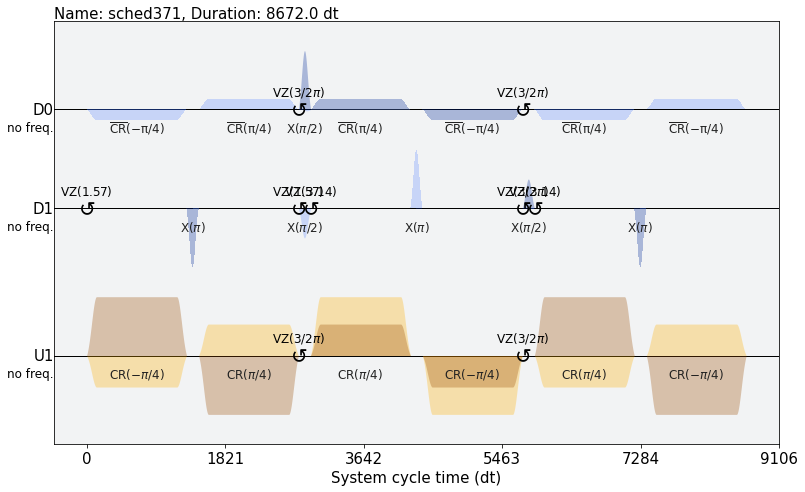

In [6]:
out.pulse_sequence.draw()

In [7]:
# can alternatively pass in a list of quantum circuits
qc0, qc1 = qiskit.QuantumCircuit(2), qiskit.QuantumCircuit(2)
qc0.append(AceCR("+-"), [1, 0])
qc1.append(AceCR("-+", np.pi / 2), [1, 0])

out = provider.ibmq_compile([qc0, qc1], target="ibmq_bogota_qpu")

In [8]:
print(out.circuits[0])

     ┌───────────┐
q_0: ┤1          ├
     │  Acecr_pm │
q_1: ┤0          ├
     └───────────┘


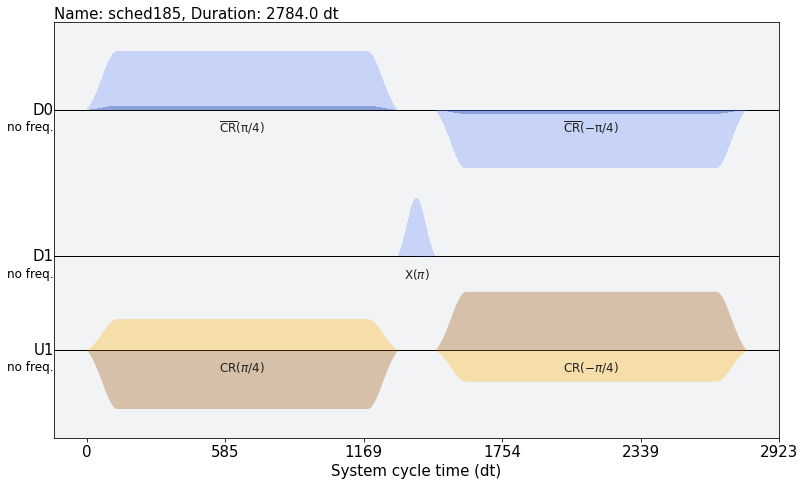

In [9]:
out.pulse_sequences[0].draw()

In [10]:
print(out.circuits[1])

     ┌───────────────────┐
q_0: ┤1                  ├
     │  acecr_mp_rx(π/2) │
q_1: ┤0                  ├
     └───────────────────┘


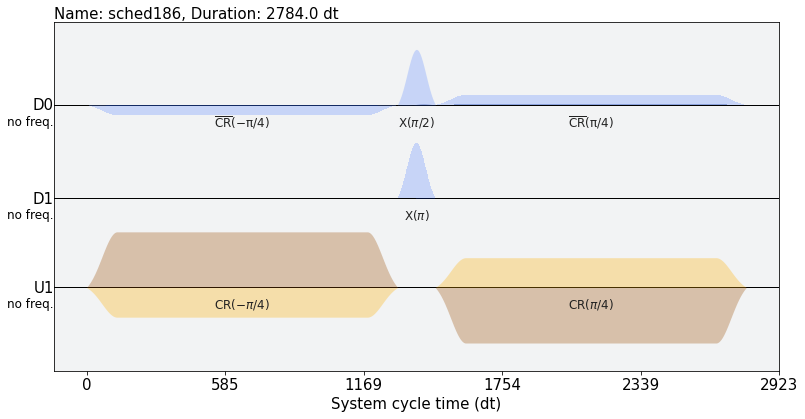

In [11]:
out.pulse_sequences[1].draw()